For this exercise, I will use OpenAI Gym's Taxi-v2 environment to design an algorithm to teach a taxi agent to navigate a small gridworld. 

The description of the environment from subsection 3.1 of this [paper](https://arxiv.org/abs/cs/9905014).

In [91]:
from agent import Agent
from monitor import interact
import gym
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [83]:
def simulate(agent, env):
    """
    simulate the interaction between the agent and the environment
    """
    state = env.reset()
    env.render()
    rewards = 0
    while True:
        action = agent.select_action(state)
        state, reward, done, _ = env.step(action)
        env.render()
        rewards += reward
        print('total rewards:' ,rewards)
        if done:
            break

In [84]:
def evalute(agent, env, episode=100):
    """
    evalute the agent
    """
    rewards_list = []
    for i in range(episode):    
        state = env.reset()
        rewards = 0
        while True:
            action = agent.select_action(state)
            state, reward, done, _ = env.step(action)
            rewards += reward
            if done:
                break
        rewards_list.append(rewards)
    print('The average reward of {} trials is {}'.format(episode, np.mean(rewards_list)))
    return rewards_list

In [92]:
env = gym.make('Taxi-v2')
agent = Agent(alpha=1)
avg_rewards, best_avg_reward = interact(env, agent, num_episodes=10000)

Alpha:1
Episode 10000/10000 || Best average reward 9.182



### the reward is very unstable

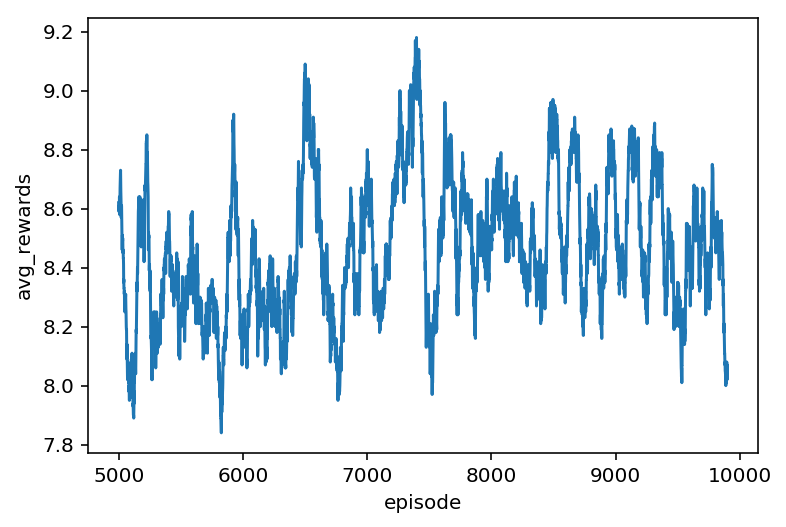

In [93]:
plt.plot(np.asarray(range(5000,len(avg_rewards))), np.array(avg_rewards)[5000:])
plt.xlabel('episode')
plt.ylabel('avg_rewards');

The average reward of 1000 trials is 8.49


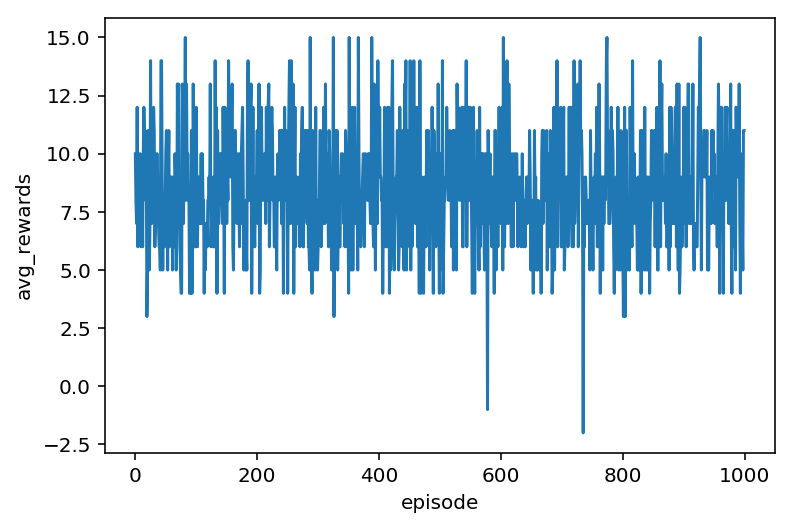

In [94]:
rewards = evalute(agent, env, episode=1000)
plt.plot(np.asarray(range(000,len(rewards))), np.array(rewards)[000:])
plt.xlabel('episode')
plt.ylabel('avg_rewards');

### let's  see what the agent can do now

In [90]:
simulate(agent, env)

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
total rewards: -1
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
total rewards: -2
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
total rewards: -3
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
total rewards: -4
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
total rewards: -5
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (North)
total rewards: -6
+---------+
|R: | : :G|
| : : : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (North)
total rewards: -7
+---------+
|R: | : :G|
| : : : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
total rewards: -8
+---------+
|R: | : 

It looks like every action is resonable,excellent

## Finetune the parameters 

In [10]:
recorder = {'best_avg':-np.inf,
            'alpha': -1,
            'best_agent':None}
alpha = np.linspace(1, 0.001, num=5, endpoint=True)
for a in alpha:
    agent = Agent(alpha=a)
    _, best_avg_reward = interact(env, agent)
    if best_avg_reward > recorder['best_avg']:
        recorder['best_avg'] = best_avg_reward
        recorder['alpha'] = a
        recorder['best_agent'] = agent

Alpha:1.0
Episode 20000/20000 || Best average reward 9.372

Alpha:0.75025
Episode 20000/20000 || Best average reward 9.278

Alpha:0.5005
Episode 20000/20000 || Best average reward 9.211

Alpha:0.25075000000000003
Episode 20000/20000 || Best average reward 9.229

Alpha:0.001
Episode 20000/20000 || Best average reward -203.75



In [11]:
recorder

{'best_avg': 9.3699999999999992,
 'alpha': 1.0,
 'best_agent': <agent.Agent at 0x110409c88>}